# Сборный проект №1 : интернет-магазин «Стримчик»

______________________________
**Описание проекта:**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных в исходном датасете:**

* Name — название игры

* Platform — платформа

* Year_of_Release — год выпуска

* Genre — жанр игры

* NA_sales — продажи в Северной Америке (миллионы проданных копий)

* EU_sales — продажи в Европе (миллионы проданных копий)

* JP_sales — продажи в Японии (миллионы проданных копий)

* Other_sales — продажи в других странах (миллионы проданных копий)

* Critic_Score — оценка критиков (максимум 100)

* User_Score — оценка пользователей (максимум 10)

* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

*Примечания:*

* Известно зараннее что данные могут быть не полными.

**Предварительный план работы:**

1) Этап № 1 - Инициализация.

2) Этап № 2 - Предобработка данных.

3) Этап № 3 - Исследовательский анализ данных.

4) Этап № 4 - Региональный анализ профиля пользователя.

5) Этап № 5 - Проверка гипотез.

6) Этап № 6 - Общие выводы.


## Инициализация

В данном этапе производится вызов библиотек для работы с данными и запись этих же данных в датафрейм(переменную).

**План этапа:**

1) Вызов библиотек.

2) Загрузка данных в переменную.

### Вызов библиотек

In [9]:
# Установка (в тренажере не нужно)
!pip install plotly.express -q

In [10]:
# Дефолтные импорты 
import pandas as pd 
import numpy as np 

# Статистика 
from scipy import stats as st # Статистические функции
from scipy.stats import binom # Биномиальное распределение

# Графики
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt

In [11]:
# Настройки вывода
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)

### Загрузка данных в переменную

**функции:**

In [14]:
def pre_analizer(df):
    '''
    pre_analizer(df): функция для предварительного просмотра датасета

    df - датасет

    принимает датасет и выводит общую информацию по нему, первые и последние 5 строк. Описательную статистику. 
    Количество пропусков (плюс процентное соотношение их).
    

    
    '''
    stp='='*15
    print(stp+' Общая информация о датасете '+stp)
    df.info()
    print(stp+' Первые и полседние 5 строк '+stp)
    display(game_data.head(5))
    display(game_data.tail(5))
    print(stp+' Описательная статистика '+stp)
    display(game_data.describe().T)
    print(f"{stp} Пропуски в датасете {stp}")
    missing_percentage = df.isnull().sum() / len(df) * 100
    print("Процент пропущенных значений по столбцам:")
    for column, percentage in missing_percentage.items():
       print(f"  {column}: {percentage:.2f}%")
     
    
    
    

In [15]:
def uniq(df,chek_list):
    '''
    uniq(df,chek_list): функция для массового вывода уникальных значений 

    df - датасет
    chek_list - список столбцов
    
    принимает датасет и выводит все уникальные значения для выбранных столбцов.
    
    '''

    for i in chek_list:
        print(f'Уникальные значения для столбца {i}')
        display(df[i].unique())
        print('\n')

In [16]:
file_patch_practic = '/datasets/games.csv'
file_patch_home = r'C:\Users\enotm\Documents\GitHub\-Portfolio\project_2'

try:
    game_data = pd.read_csv(file_patch_home + r'\games.csv')
    print('Данные успешно загружены!')
except Exception as e:
    print(f'Ошибка: {e}')

Данные успешно загружены!


In [17]:
pre_analizer(game_data)

=============== Общая информация о датасете ===============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
=============== Первые и полседние 5 строк ===============


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


=============== Описательная статистика ===============


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.48,5.88,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.26,0.81,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.15,0.50,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.08,0.31,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.05,0.19,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.97,13.94,13.0,60.0,71.00,79.00,98.00


=============== Пропуски в датасете ===============
Процент пропущенных значений по столбцам:
  Name: 0.01%
  Platform: 0.00%
  Year_of_Release: 1.61%
  Genre: 0.01%
  NA_sales: 0.00%
  EU_sales: 0.00%
  JP_sales: 0.00%
  Other_sales: 0.00%
  Critic_Score: 51.32%
  User_Score: 40.09%
  Rating: 40.48%


**Заметки:**

Данные успешно загружены, при первичном осмотре выявлены замечания-


1) Названия столбцов необходимо привести к общему виду. (в данном случае к нижнему регистру)

2) Есть пропуски, при этом в некоторых случай их процент переваливает за 40 пунктов.

3) Есть аномалии - 0-вые продажи.

4) Пропуски в "Name" востановить или заменить маской не представляется возможным - можно удалить.

5) Пропуски в "Genre" имеет 0,1% пропусков, востанавливать не имеет смысла - можно удалить.

6) Остальные пропуски стоит рассмотреть более детально.

7) Много текстовых столбцов, необходимо основательно проверить данные на дубликаты (неявные и явные).

8) В некоторых случаях нужна ретипизация.

Датасет перед исследованием необходимо подвергнуть предобработке. Стоит добавить столбец с общими продажами для исследования.

## Предобработка данных.

Все столбцы записаны в верхнем регистре, в остальном стиль записи приемлимый.

* Понизим регистр в названиях столбцов и выведем их на экран для проверки.

In [22]:
# Понижение регистра
game_data.columns = game_data.columns.str.lower()
# Вывод столбцов для проверки
game_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], dtype='object')

Столбцы приведены в надлежащий вид, теперь просмотрим уникальные значения в столбцах с пропусками. 'name' будет чиститься от пропусков в любом случае, этот признак не заменить и не вытащить.

In [24]:
# Удаляем пропуски в столбцах
critical_columns = ['name', 'genre']
game_data = game_data.dropna(subset=critical_columns).reset_index(drop=True)

In [25]:
chek_list_1=['platform', 'year_of_release', 'critic_score', 'user_score', 'rating']

uniq(game_data,chek_list_1)

Уникальные значения для столбца platform


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)



Уникальные значения для столбца year_of_release


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])



Уникальные значения для столбца critic_score


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])



Уникальные значения для столбца user_score


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)



Уникальные значения для столбца rating


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- 'name' - решено изначально удалить пропуски.

- year_of_release - заменим самым модой опираясь на тип платформы и жанр ( сохраняем целостность).Тип данных приведем к int8.

- critic_score - пропуски оставим, тип данных приведем к float4. Диапазон оценок от 0,0 до 100,0.

- user_score - пропуски оставим,  тип данных приведем к float4. Диапазон оценок от 0,0 до 10,0.

- rating - ставим маску  "not_assigned"

* Удаляем записи с пропусками в 'name','gener' и 'year_of_release'(невозможно заполнить, влияние <5% на выборку).

In [27]:
# Заполняем модой по комбинации Platform и Genre
game_data['year_of_release'] = game_data.groupby(['platform', 'genre'])['year_of_release']\
                                      .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))
print(f'Пропуски после обработки =  {game_data['year_of_release'].isna().sum()}')

Пропуски после обработки =  0


In [28]:
game_data['year_of_release'] = game_data[['year_of_release']].apply(pd.to_numeric, errors='coerce').astype('int16')
game_data[['user_score', 'critic_score']] = game_data[['user_score', 'critic_score']].apply(pd.to_numeric, errors='coerce').astype('float16')
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int16  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float16
 9   user_score       7590 non-null   float16
 10  rating           9949 non-null   object 
dtypes: float16(2), float64(4), int16(1), object(4)
memory usage: 1.1+ MB


In [29]:
# Замена NaN на "not_assigned"
game_data['rating'] = game_data['rating'].fillna('not_assigned')
# Проверка
game_data['rating'].unique()

array(['E', 'not_assigned', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

* Проверим датафрейм на явные дубликаты.

In [31]:
print(f'Количество дубликатов: {game_data.duplicated().sum()}')

Количество дубликатов: 0


* Проверим датафрейм на не явные дубликаты.

In [33]:
chek_list_2=['platform', 'genre', 'rating', 'name']

uniq(game_data,chek_list_2)

Уникальные значения для столбца platform


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)



Уникальные значения для столбца genre


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)



Уникальные значения для столбца rating


array(['E', 'not_assigned', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)



Уникальные значения для столбца name


array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Дубликаты отсутсвуют, схожесть в названиях игр обусловлена тем что у игры может быть ремастер, разные издания, версии (одна серия ххх.1 ххх.2 и т.д.)

### Добавление новых столбцов

Для дальнейших исследований понадобятся данные о общих продажах, запишем их в новый столбец.

In [37]:
# Создание нового столбца
game_data['total_sales'] = game_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
# Проверочный вывод
game_data.head(8)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not_assigned,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not_assigned,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,not_assigned,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


### Выводы:

1) Названия столбцов были приведены к единому виду.

2) Пропуски были обработаны.

3) Где необходимо была проведена ретипизация.

4) Дублей не было обнаружено.

*Примечания :*

Пропуски случаях оценок, и простановки рейтингов,  могли появится из за малой популярности игры, или же из за фокуса прверяющих органов на более актуальных проектах.

Пропуски с годом релиза были заполнены модой с привязкой к жанру и платформой. При надобности сделать более точную подстановку, можно запустить парсинг по сети используя название игры вытягивая год релиза, при этом для точности  моду по трем первым найденым результатам, или же даже если появится столбец с издателем парсинг можно проводит по сайту издателя, как правило данная информация там содержится. М

## Исследовательский анализ данных.

В данном этапе будут проведены исследования данных по поставленой задаче:

1) "Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?"

2) "Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?"

3) "Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах."

4) Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год."(Не учитывайте в работе данные за предыдущие годы.)

5) "Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?"

### Релизный анализ

In [43]:
game_data['year_of_release'].describe()

count    16713.00
mean      2006.47
std          5.90
min       1980.00
25%       2003.00
50%       2007.00
75%       2010.00
max       2016.00
Name: year_of_release, dtype: float64

Самый раннний релиз пришел на 1980 год, а самый поздний на текущий  2016-й. Основная гурппа релизов сотредоточнена на периоде от 2003 года  до 2010 года.

Стоит расмотреть общую картину , и далее ограничить иссследование в рамки диапазона для более детального рассмотрения.

Так как график потребуется вызывать несколько раз, создадим свою функцию.

In [45]:
def release_bar_chart(var_size=(16, 8),
                       var_bins=30,
                       var_flag=False,
                       var_color='red',
                       var_range=None):
    # Фильтрация данных по диапазону, если флаг установлен
    if var_flag and var_range is not None:
        filtered_data = game_data[(game_data['year_of_release'] >= var_range[0]) & 
                                   (game_data['year_of_release'] <= var_range[1])]
    else:
        filtered_data = game_data

    # Подсчет количества игр по годам
    counts = filtered_data['year_of_release'].value_counts().sort_index()

    # Построение столбчатой диаграммы
    plt.figure(figsize=var_size)  # Установка размера фигуры
    counts.plot(kind='bar', color=var_color, edgecolor='black')

    plt.title('Количество релизов по годам')
    plt.xlabel('Год релиза')
    plt.ylabel('Количество игр')
    plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
    plt.grid(axis='y')  # Сетка только по оси Y
    plt.show()  # Отображение графика

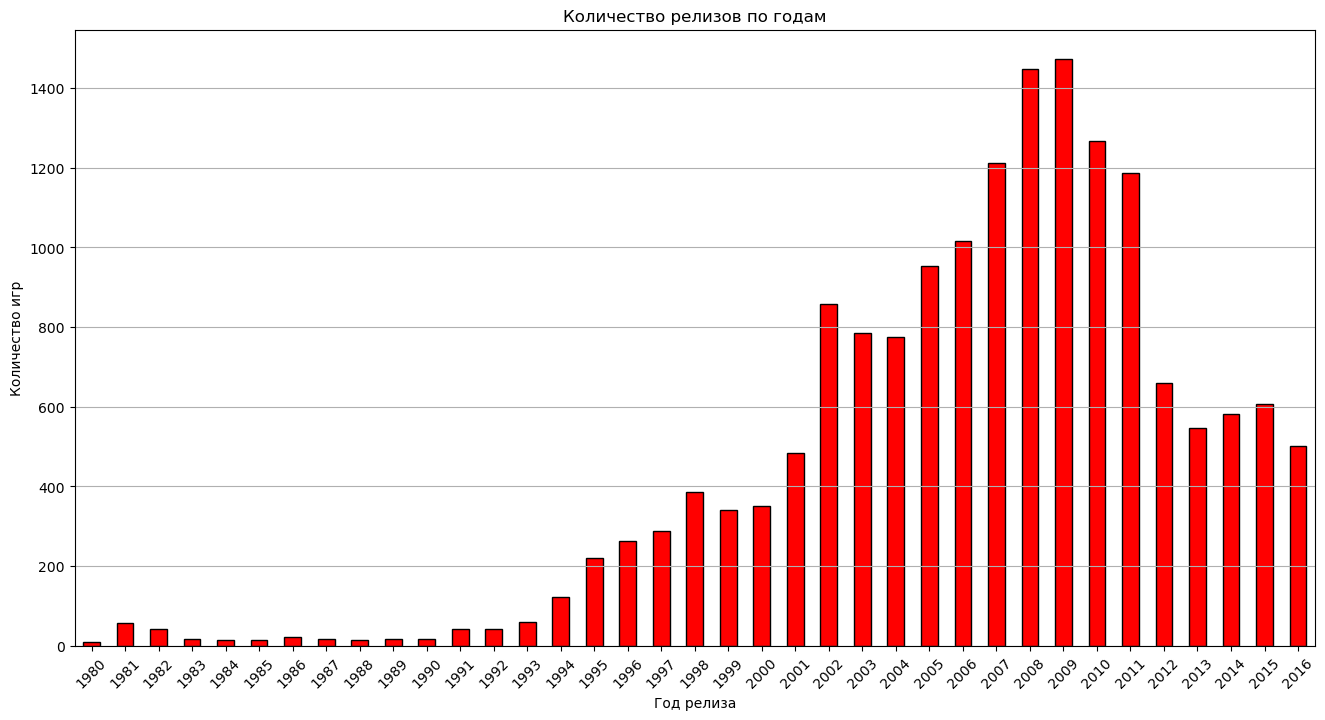

In [46]:
release_bar_chart()

Из графика видно что в периоде до 1990 года игры выпускались реже. Это, вероятнее всего, связано с тем, что отросоль только развивалась. Первые пероснальные компьютеры были жутко дорогие и были сильно распространены, а игровые приставки только начали свой путь. 

Начианя с  90-х пошел активный рост релизов до 2010 года, далее пошел небольшой спад. Отрасль развилась и у игроков вероятно выросли запросы, технологии стали сложнее и к разработке игр стали относиться серьезнее.

Изучим ненмного оба периода.

In [48]:
game_data[game_data['year_of_release'] < 1990]['platform'].value_counts()

platform
2600    133
NES      75
GB       11
PC        2
DS        1
Name: count, dtype: int64

Есть три подозрительных случая :

- DS - портативная консоль от компании nintendo выпущена в 2004 году.
- PC - персональный компьютер, стоит проверить выпускались ли данные игры на него.

In [50]:
suspicious_guys=game_data[game_data['year_of_release'] < 1990]
display(suspicious_guys[suspicious_guys['platform']== 'PC'])
display(suspicious_guys[suspicious_guys['platform']== 'DS'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14468,Alter Ego,PC,1985,Simulation,0.0,0.03,0.0,0.01,59.0,5.8,T,0.04
14619,SimCity,PC,1988,Simulation,0.0,0.02,0.0,0.01,64.0,2.2,E10+,0.03


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,not_assigned,0.02


Strongest Tokyo University Shogi DS на данную консоль вышла 2004 году [пруф](https://arcadetemple.com/strongest-tokyo-university-shogi-ds-sales-numbers/). Заменим значение на 2004.

Обе игры на пк дествительно вышли в те годы.

Strongest Tokyo University Shogi DS - заменяем год выпуска на 2004. 

In [52]:
game_data.loc[
    (game_data['platform'] == 'DS') & 
    (game_data['year_of_release'] < 2004),
    'year_of_release'
] = 2004

Теперь можно рассмотреть график годов релизов от 1990 года.

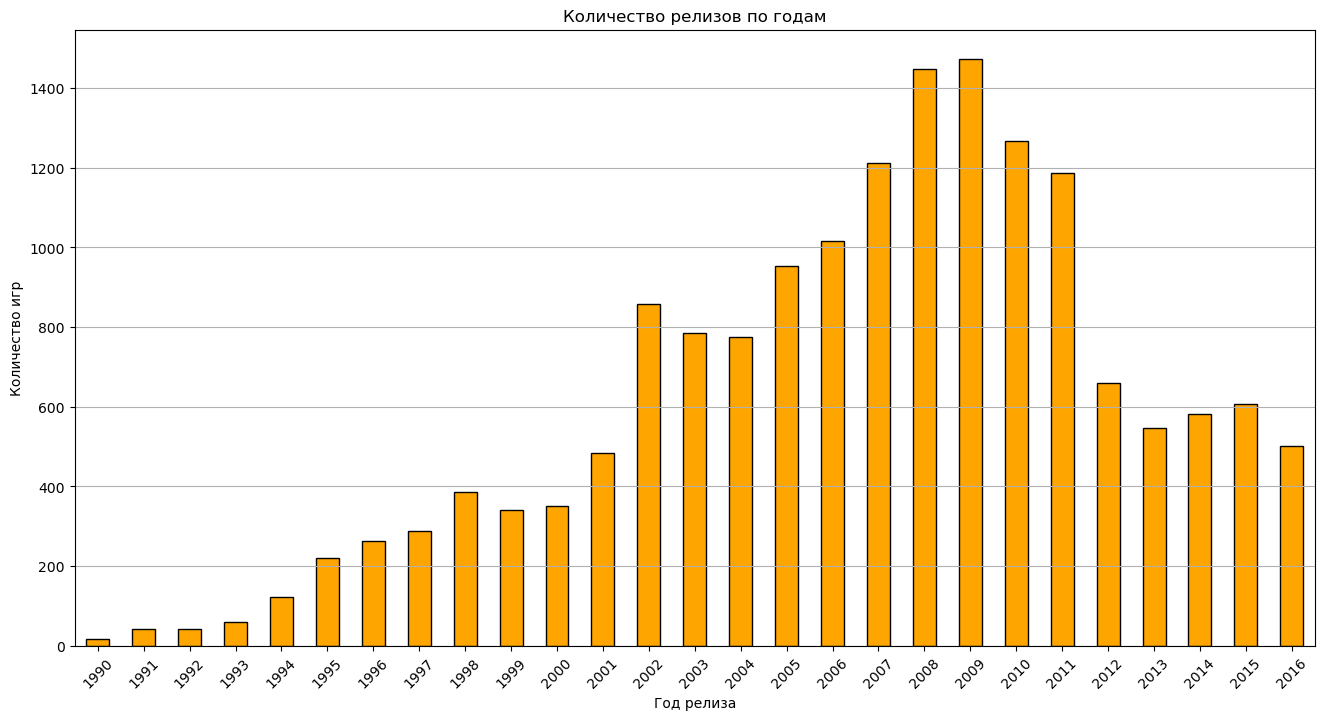

In [54]:
release_bar_chart(var_flag=True,
            var_color='orange',
            var_bins=25,
            var_range=(1990,2016))

До 2010-го года рост был релизов был активным, далее , в связи с техническим прогрессом, конкуренцей на рынке, изменением подхода к созданию и требованиям игроков - скорость разработки замедлилась, об этом говорит резкий спад релизов к  2013-му году. После 2013 года игры стали выходить практически конвеером фиксированно - вероятно устоялись какие то из издателей, и бизнес повел все по прямой.

*Примечание*

На сколько знаю в определенные года пошла тенденция что курпные издатели  договариваются на счет годов и дат релизов своих детищ чтоб минимизировать влияние друг для друга, так по примеру из за слухов о релизе GTA6 многие проекты смещали даты релиза до или сильно позже, и так же есть сведения о договорах о ценах, но это тема для отдельного исследования.

*Разбор вопроса заказчика:*

Отвечая на вопрос "Важны ли данные за все периоды?" можно сказать, что ответ зависит от целей исследования, и если брать данные для составления каких либо предположений о будущих успехах рекомендуется учесть: на сколько быстро развивается направление,и как меняется технический подход к выпуску игр, как меняется конкуренция на рынке в данном сегменте. Для более честного разбора рекомендуется анализировать в разрезе каждых 2-3 лет (при этом оглядываясь вокруг, отросль меняется очень быстро и вероятно прийдется очень своевременно менять подход).

### Первичное изучение платформ

Для начала сформируем сводную таблицу по общим продажам от каждого типа платформ.

In [59]:
platform_sales = game_data.pivot_table(index='platform', 
                                       values='total_sales', 
                                       aggfunc='sum').sort_values(by='total_sales', 
                                                                  ascending=False)

* Выведем столбчатую диаграмму продаж

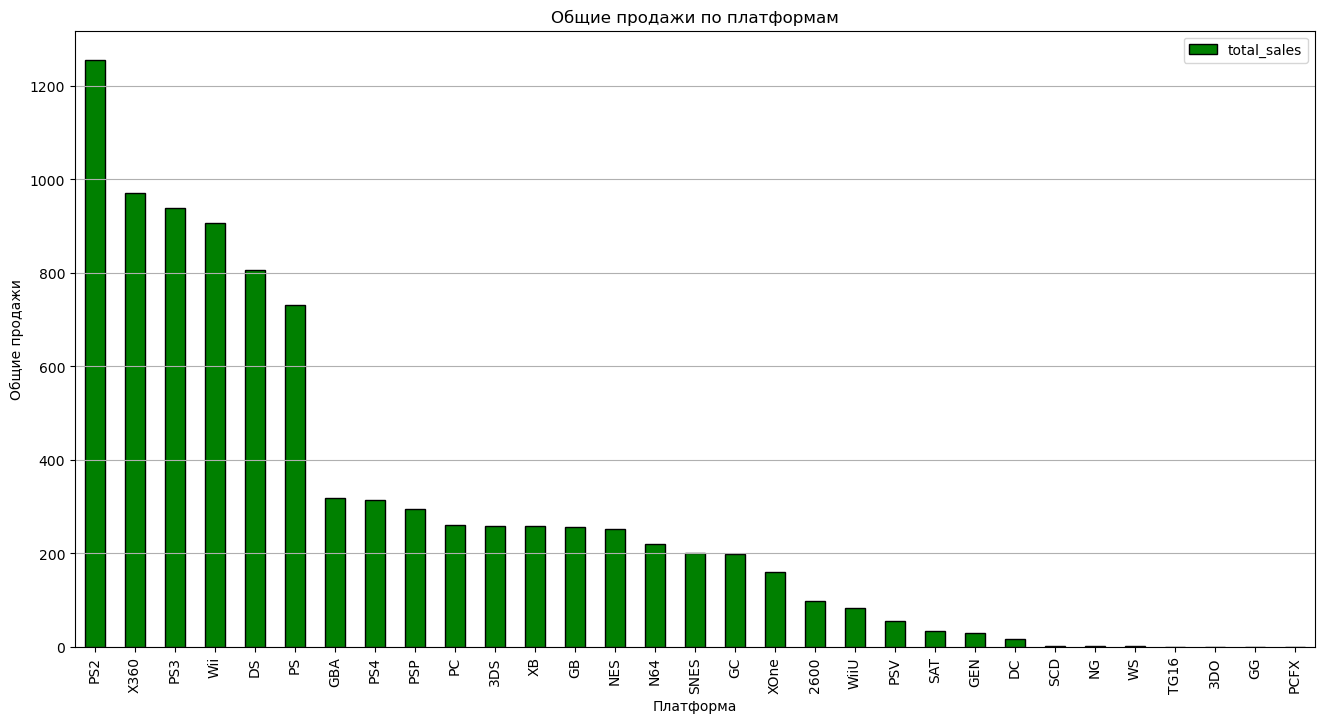

In [61]:
platform_sales.plot(kind='bar', color='green', edgecolor='black',figsize=(16,8))
plt.title('Общие продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
plt.xticks(rotation=90)  # Поворот меток по оси X 
plt.grid(axis='y')  # Сетка только по оси Y
plt.show()  

По диаграмме  видно, что  по максимальным суммарным продажам выделяются 6 платформ: "PS2", "X360", "PS3", "Wii", "DS", "PS".

* Выделим топовые платформы и сгрупируем их по количеству продаж и году релиза.

In [64]:
top_sale_platforms = platform_sales.sort_values(by='total_sales', ascending=False).head(6).index.tolist()

top_sale_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

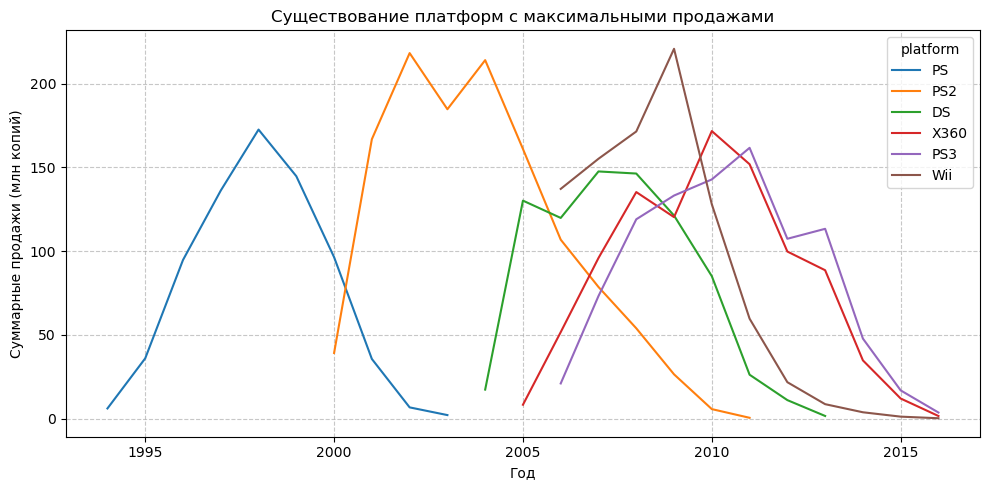

In [65]:
# Фильтруем данные и группируем по годам и платформам
sales_data = (
    game_data[game_data['platform'].isin(top_sale_platforms)]
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
)

# Преобразуем Series в DataFrame с сбросом индекса
sales_data = sales_data.reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_data, x='year_of_release', y='total_sales', hue='platform')
plt.title('Существование платформ с максимальными продажами')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Исходя из полученной с графика информации , приставки теряют актуальность с выходом новой (это может быть один и тот же разработчик, а могут быть конкуренты).

примеры: 

PS, PS2 и PS3 - семейство Sony, первая итерация достаточно быстро сдала позиции, а вот вторая держалась дольше, вероятно из-за высокой цены на старте.


Исходя из полученного графика, видно, что каждая платформа имеет "время жизни" ~ 10 лет, при этом, рост популярности идет в  течении 5 лет до пика, а далее происходит спад.

*Примечание*

Так же важно учитывать тип платформы - игровая приставка, портативная приставка или пк. Все это отдельные сегменты пользователей и для каждого имеется свой набор критерьев вляющих на продажи популярность и время жизни. Часть портативных приставок потеряли позиции из за возросшего качества смартфонов и появления мобильного гейминга, а так же различных эмуляторов ( сега и псп на вашем телефоне).

Плюс это хорошо видно вокруг нынешних (2024-2025 года) новостей по портативным консолям - steamdeack asus_rog и другие, начинается новая гонка - портативный гейминг портов с пк, покорение игр легким и шустрым линукс системам ( Valve взяли за основу ubuntu и активно пишут программы чтоб игры запускались (proton))

*Разбор вопроса аналитиков:*

Отвечая на вопрос "За какой характерный срок появляются новые и исчезают старые платформы?",ответом будет: ~ 10 лет.

### Детальное изучение платформ

Основываясь на актуальности, лучшим решением будет исследовать данные за последние 2 года.

* Рассмотрим самый свежий период продаж - последние 2 года.

In [71]:
# сортировка по последним 2 годам
two_years_diapason = game_data[game_data['year_of_release'] >= 2014]
# Вывод
display(two_years_diapason.head(5))
print(f'Колличество строк {two_years_diapason.shape[0]}')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not_assigned,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,not_assigned,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,not_assigned,7.98


Колличество строк 1691


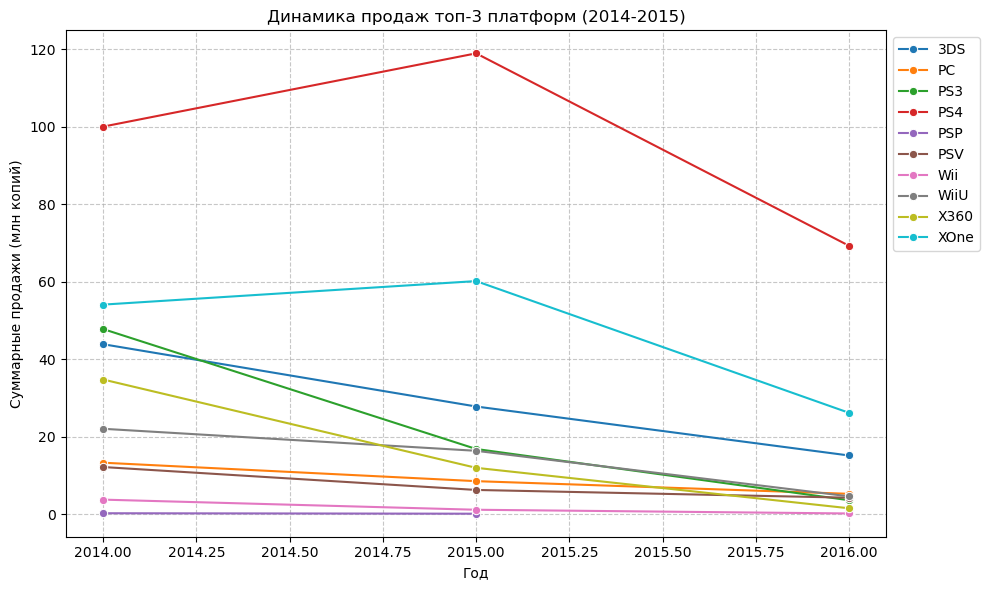

In [72]:

# Группируем данные по годам и платформам
sales_data_two = (
    two_years_diapason
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

# Визуализация
plt.figure(figsize=(10, 6)) 
sns.lineplot(data=sales_data_two, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Динамика продаж топ-3 платформ (2014-2015)')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

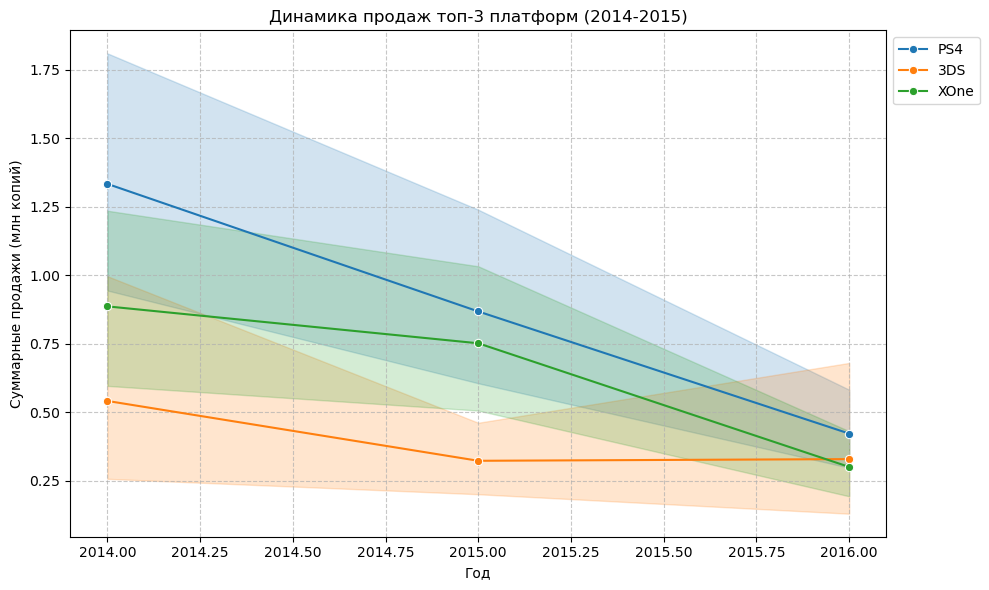

In [73]:
# Находим топ-3 платформы по общим продажам за 2014-2015
top_platforms_list = (
    two_years_diapason
    .groupby('platform')['total_sales']
    .sum()
    .nlargest(3)
    .index
)
top_platforms=two_years_diapason[two_years_diapason['platform'].isin(top_platforms_list)]

# Визуализация
plt.figure(figsize=(10, 6)) 
sns.lineplot(data=top_platforms, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Динамика продаж топ-3 платформ (2014-2015)')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**Ответы на вопросы для заказчиков:**

*"Какие платформы лидируют по продажам, растут или падают?"* - применим данные полученые в предыдущем под-этапе.

* По продажам лидируют "PS2", "X360", "PS3", "Wii", "DS", "PS".

* От релиза консоли в среднем идет подьем за 5 лет, далее она устаревает/появляется новое поколение и идет спад до прекращения продаж.

Стоит учитывать так же и тип платформы - персональный компьютер не вошел в топ, но при этом остается стабильной платформой для игр и стоит отдельных исследований, так же неоднозначно идет с портативными консолями - DS не спроста имеет отличный от остальных в топе период жизни, так как его спад приходится на релиз PSP от SONY. Дальше более интересная и новая консоль всегда затмит старую.

*"Выберите несколько потенциально прибыльных платформ."*

Ответом на этот вопрос частично послужат выводы из предыдущего, и в дополнение стоит отметить свежие консоли "PS4", "XOne", "3DS" про них еще можно сказать что они прибыльные. Выделили их в одтельную выборку.

________
**Задача:** "Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат."

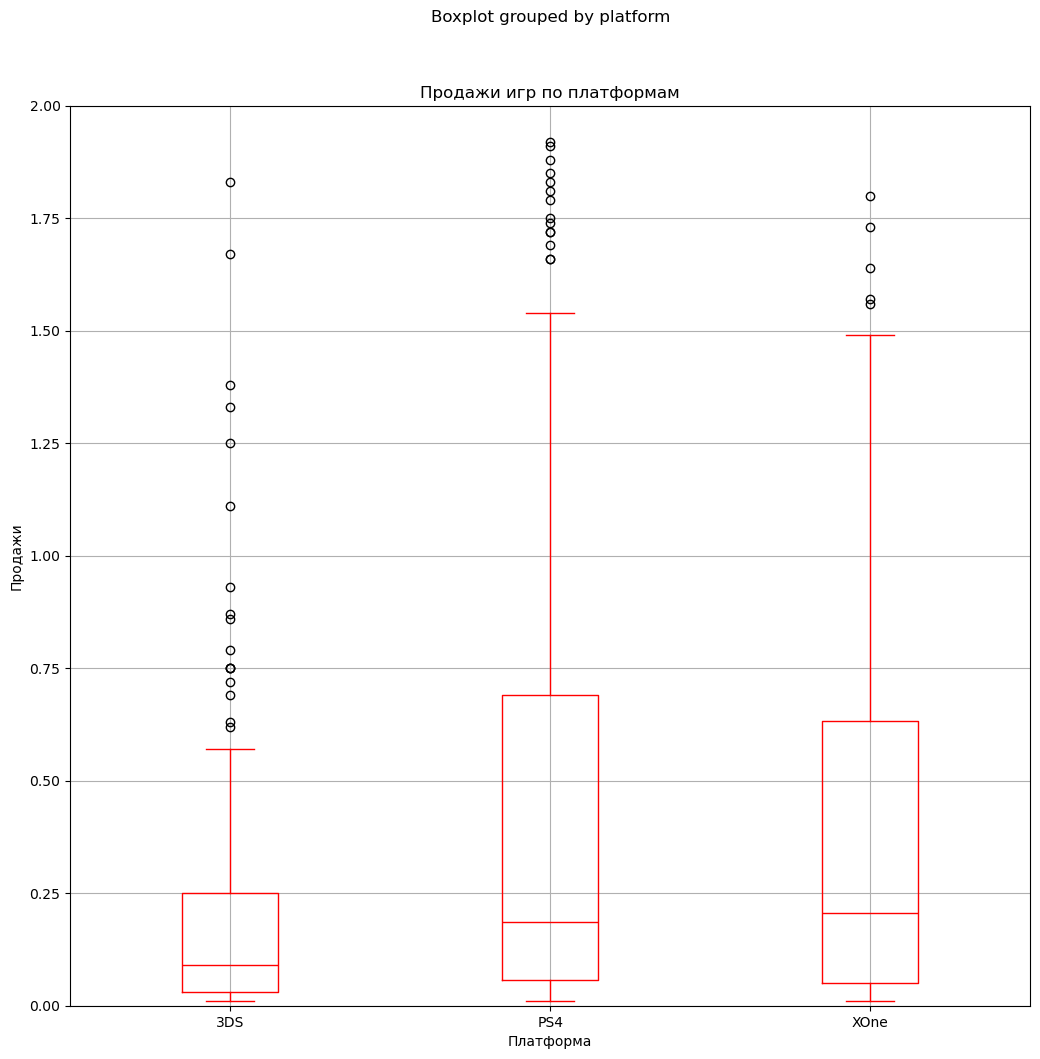

In [76]:
top_platforms.boxplot(by='platform', column=['total_sales'], figsize=(12,12),color='red')
plt.ylim(0,2)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

**Исправленый вывод**

1) Все платформы имеют выбросы.

2) "PS4" имеет максимальное значение 3-его квартиля, медианный показатель схож с "XOne".

3) "3DS" теряет актуальность.

Наиболее перспективными можно считать платформы "PS4" и "XOne". ( Классические приставки от тех-гигантов)

**Задача:** Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [79]:
# сортировка по последним 2 годам
two_years_ps4 = two_years_diapason[two_years_diapason['platform'] == "PS4"]
# Вывод
display(two_years_ps4.head(5))
print(f'Колличество строк {two_years_ps4.shape[0]}')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not_assigned,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,not_assigned,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


Колличество строк 376


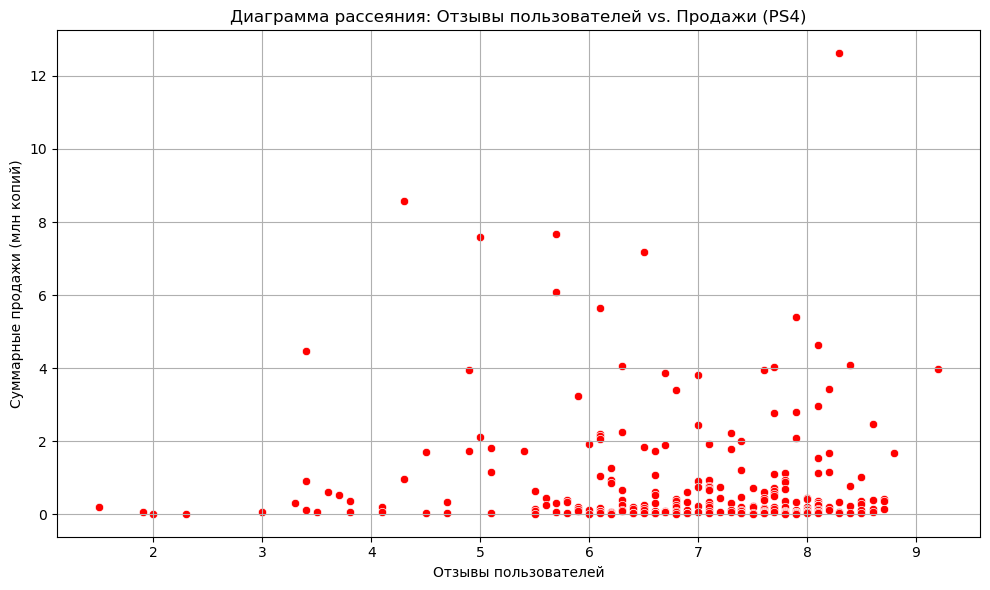

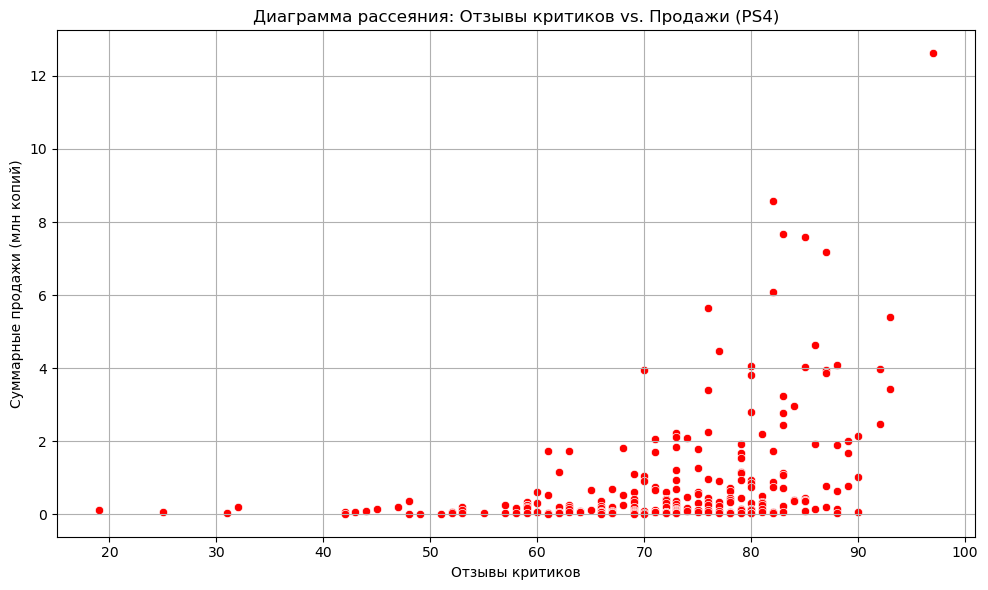

In [80]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=two_years_ps4, x='user_score', y='total_sales',color='red')
plt.title('Диаграмма рассеяния: Отзывы пользователей vs. Продажи (PS4)')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=two_years_ps4, x='critic_score', y='total_sales',color='red')
plt.title('Диаграмма рассеяния: Отзывы критиков vs. Продажи (PS4)')
plt.xlabel('Отзывы критиков')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:

ps4_cor = two_years_ps4[['critic_score','user_score', 'total_sales']]
ps4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.00,0.55,0.40
user_score,0.55,1.00,-0.04
total_sales,0.40,-0.04,1.00


**Выводы:**

1) Коэффициент корреляции между critic_score и user_score (0.55): - есть умеренная положительная корреляция . Это означает, что, как правило, более высокие оценки критиков связаны с более высокими оценками пользователей. Однако связь не является очень сильной, что предполагает, что мнения критиков и пользователей могут различаться.

2) Коэффициент корреляции между critic_score и total_sales (0.40): - Здесь также наблюдается умеренная положительная корреляция. Это говорит о том, что игры с более высокими оценками критиков, как правило, имеют более высокие продажи. Тем не менее, эта связь не является достаточно сильной, чтобы утверждать, что высокая оценка критиков обязательно приводит к высоким продажам.

3) Коэффициент корреляции между user_score и total_sales (-0.04): Связь практически отсутствуюет. Мнения пользователей об играх практически не влияют на их коммерческий успех или что на продажи влияют другие факторы.


*Итог:*

В целом, данные показывают, что оценки критиков оказывают более значимое влияние на продажи игр по сравнению с оценками пользователей.

Умеренная положительная корреляция между оценками критиков и пользователей может указывать на то, что игры, которые нравятся критикам, также могут быть привлекательными для игроков.

Отсутствие связи между оценками пользователей и продажами предполагает необходимость анализа других факторов, влияющих на коммерческий успех игр.

* Для дальнейшей работы по прогнозированию выберу 2011 год, не брав в учёт года ранее.

In [84]:
two_years_xone = two_years_diapason.query('platform == "XOne"')

two_years_x360 = two_years_diapason.query('platform == "X360"')

two_years_pc = two_years_diapason.query('platform == "PC"')


xone_cor = two_years_xone[['critic_score','user_score', 'total_sales']]
display('Xone:',xone_cor.corr())

x360_cor = two_years_x360[['critic_score','user_score', 'total_sales']]
display('x360:',x360_cor.corr())

pc_cor = two_years_pc[['critic_score','user_score', 'total_sales']]
display('PC:',pc_cor.corr())



'Xone:'

,critic_score,user_score,total_sales
critic_score,1.00,0.44,0.43
user_score,0.44,1.00,-0.07
total_sales,0.43,-0.07,1.00


'x360:'

,critic_score,user_score,total_sales
critic_score,1.00,0.62,0.53
user_score,0.62,1.00,-0.14
total_sales,0.53,-0.14,1.00


'PC:'

,critic_score,user_score,total_sales
critic_score,1.00,0.47,0.17
user_score,0.47,1.00,-0.07
total_sales,0.17,-0.07,1.00


**Выводы:**

1) Влияние критиков: на всех платформах наблюдается положительная связь между оценками критиков и продажами, однако эта связь наиболее выражена на Xbox 360 (0,53) и менее выражена на ПК (0,17). Это может указывать на то, что отзывы критиков более значимы для консольных игр по сравнению с играми для ПК.

2) Оценки пользователей: на всех платформах оценки пользователей не оказывают значительного влияния на продажи игр. Это может свидетельствовать о том, что мнения игроков могут быть менее предсказуемыми или менее важными для коммерческого успеха по сравнению с мнениями критиков.

3) Согласованность мнений: на Xbox 360 наблюдается наиболее высокая степень согласованности между оценками критиков и пользователей (0,63), тогда как на ПК эта согласованность значительно ниже (0,47). Это может указывать на то, что аудитория Xbox 360 более единодушна в своих мнениях о качестве игр.

### Пожанровое распределение

In [87]:
# Создание сводной таблицы
sales_by_genre = two_years_diapason.pivot_table(index='genre', 
                                                 values='total_sales', 
                                                 aggfunc='sum').sort_values(ascending=False, 
                                                                             by='total_sales')

sales_by_genre = sales_by_genre.sort_values(ascending=False, by = 'total_sales')

sales_by_genre

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.70
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.64


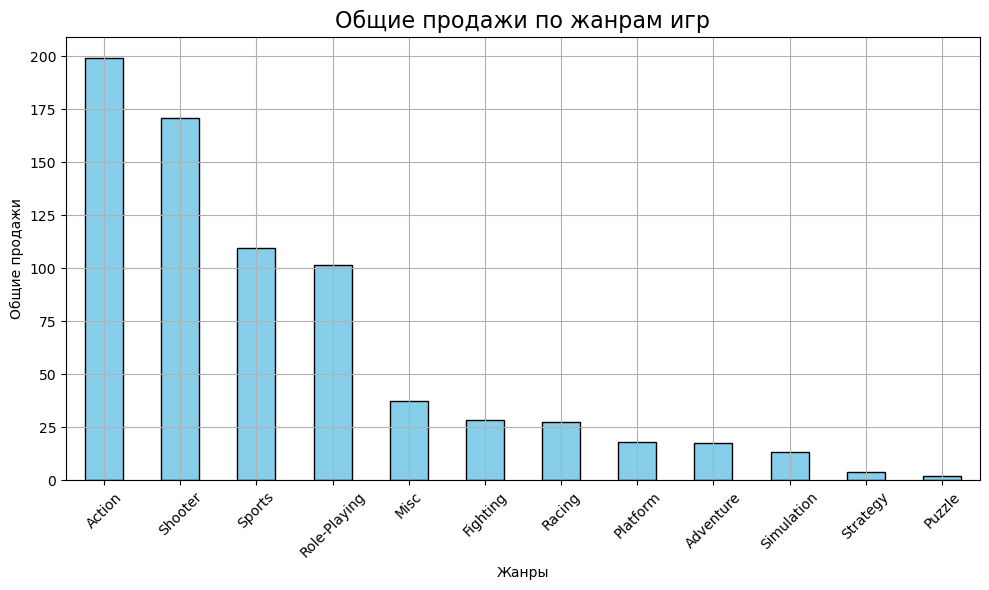

In [88]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
sales_by_genre['total_sales'].plot(kind='bar', color='skyblue',edgecolor='black',grid=True)
plt.title('Общие продажи по жанрам игр', fontsize=16)
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

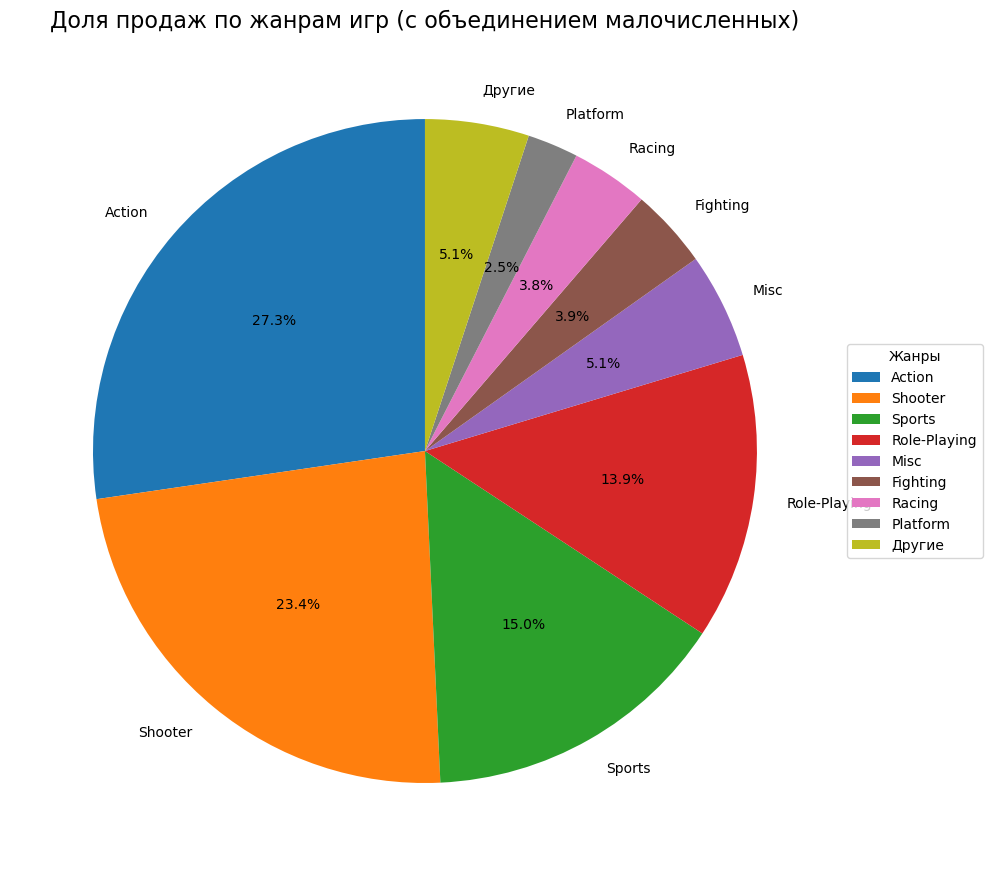

In [89]:
# Определение порога для фильтрации
threshold = sales_by_genre['total_sales'].quantile(0.30)

# Создание новой таблицы с объединением малочисленных жанров в "Другие"
filtered_sales = sales_by_genre[sales_by_genre['total_sales'] > threshold]

# получение суммарных продаж для категории "Другие"
other_sales = sales_by_genre[sales_by_genre['total_sales'] <= threshold]['total_sales'].sum()

# Создание новой строки
new_row = pd.DataFrame({'total_sales': [other_sales]}, index=['Другие'])

# Объединение датафреймов
filtered_sales = pd.concat([filtered_sales, new_row], ignore_index=False)

# Визуализация
plt.figure(figsize=(10, 10))
plt.pie(
    filtered_sales['total_sales'], 
    labels=filtered_sales.index, 
    autopct='%1.1f%%',  
    startangle=90
)

# Настройка заголовка
plt.title('Доля продаж по жанрам игр (с объединением малочисленных)', fontsize=16)

# Настройка легенды
plt.legend(
    filtered_sales.index, 
    title="Жанры", 
    bbox_to_anchor=(1, 0.5), 
    loc='center left'
)

plt.tight_layout()
plt.show()

In [90]:
# Получение описательной статистики по жанрам
descriptive_stats_by_genre = two_years_diapason.groupby('genre')['total_sales'].describe()

# Выводим результат
display(descriptive_stats_by_genre)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.32,0.80,0.01,0.03,0.09,0.28,12.62
Adventure,186.0,0.09,0.20,0.01,0.02,0.03,0.08,1.66
Fighting,60.0,0.47,1.19,0.01,0.06,0.12,0.32,7.55
Misc,113.0,0.33,0.74,0.01,0.03,0.09,0.32,5.27
Platform,38.0,0.48,0.72,0.01,0.06,0.14,0.47,3.21
Puzzle,14.0,0.16,0.32,0.01,0.02,0.04,0.10,1.19
Racing,69.0,0.40,0.96,0.01,0.03,0.09,0.25,7.09
Role-Playing,222.0,0.46,1.17,0.01,0.05,0.11,0.36,11.68
Shooter,128.0,1.34,2.05,0.01,0.17,0.52,1.62,14.63


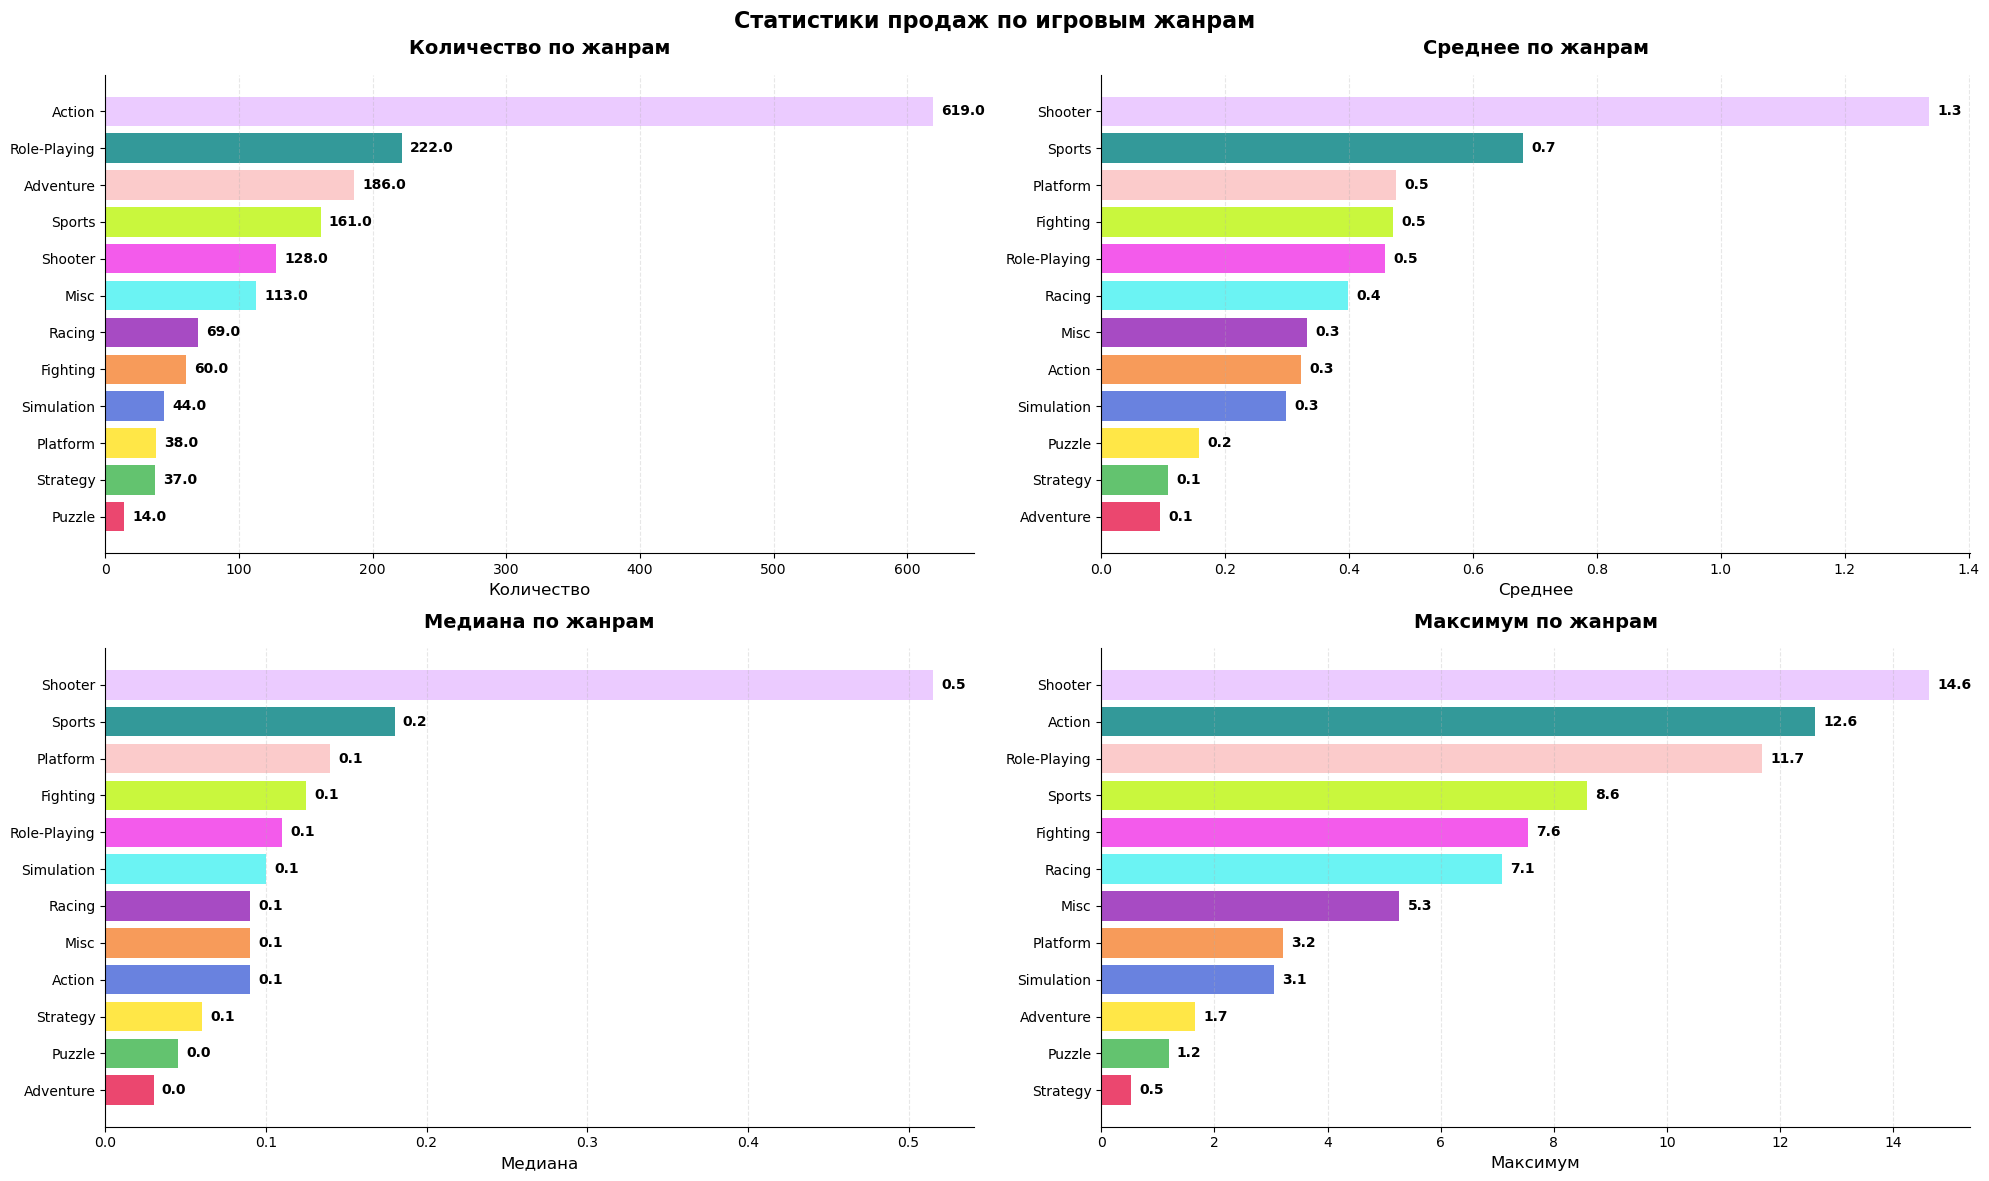

In [91]:
colors = [
    '#e6194b',  # ярко-розовый
    '#3cb44b',  # ярко-зеленый
    '#ffe119',  # ярко-желтый
    '#4363d8',  # темно-синий
    '#f58231',  # оранжевый
    '#911eb4',  # фиолетовый
    '#46f0f0',  # голубой
    '#f032e6',  # пурпурный
    '#bcf60c',  # лаймовый
    '#fabebe',  # бежевый
    
    '#008080',  # бирюзовый
    '#e6beff',  # светло-фиолетовый
    '#9a6324',  # коричневый
    '#fffac8',  # кремовый
    '#800000',  # бордовый
    
    '#aaffc3',  # светло-зеленый
    '#808000',  # оливковый
    '#ffd8b1',  # персиковый
    '#000075',  # темно-синий
    '#808080'   # серый
]
# Создаем 2x2 сетку графиков
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Статистики для отображения
stats = ['count', 'mean', '50%', 'max']

for i, stat in enumerate(stats):
    # Определяем позицию на сетке
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    # Подготавливаем данные (сортировка по возрастанию для горизонтальных барплотов)
    data = descriptive_stats_by_genre[stat].sort_values()
    
    # Создаем горизонтальный барплот
    bars = ax.barh(data.index, data.values, color=colors[:len(data)], alpha=0.8)
    
    # Настройка заголовка и подписей
    stat_names = {'count': 'Количество', 'mean': 'Среднее', '50%': 'Медиана', 'max': 'Максимум'}
    ax.set_title(f'{stat_names[stat]} по жанрам', fontsize=14, pad=15, fontweight='bold')
    ax.set_xlabel(stat_names[stat], fontsize=12)
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, data.values):
        ax.text(bar.get_width() + max(data.values)*0.01, 
                bar.get_y() + bar.get_height()/2,
                f'{value:.1f}', 
                va='center', 
                fontsize=10,
                fontweight='bold')
    
    # Улучшаем читаемость
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Общий заголовок
plt.suptitle('Статистики продаж по игровым жанрам', fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

**Вывод:**
1) Рынок перенасыщен играми жанра Action (619 миллионов продаж).

2) В среднем (почти совпадает с медианным ) часто продаются Shooter, Sports.

Высокие уровни продаж жанра Action обусловлены огромным колличеством игр в данном жанре, так же видно что весьма перспективным является жанр Shooter, Sports, об этом говорит то, что в среднем выбор стоит за этими жанрами. Не стоит списывать со счтетов жанр Role_play ,fighting  и platform в среднем (и по медиане) они держатся на одном популярном уровне уступая фаворитам, но занимающими хороший серединный уровень.


### Выводы:

1) в периоде до 1990 года игры выпускались редко, это может быть связано с тем что отросоль только развивалась, при этом от 1990 года пошел активный рост релизов до 2012 года, далее пошел небольшой спад.

2) Судя по всему проекты стали сложнее технически и на их разработку стало тратиться больше времени, а пики указывают на то что студии старались успеть за конкурентами и поэтому год релиза популярных проектов часто совпадал.

3)  Максимальные суммарные продажи за платформами "PS2", "X360", "PS3", "Wii", "DS", "PS".

4) Платформы  живут  примерно в течении 10 лет, но имеют пиковые значение всего 5 лет.

5) За последние 2 года платформа PS4 и XOne имели успех, но так же имеют тенденцию идти на спад.

6) Продажи слабо зависят от оценок пользователей , при этом  к оценкам критиков прислушиваются.

7) Наибольший спросс за два года  имеют игры с жанром "Action, Schooter" и "Sports", так  же перспективу имеет "Role_paling".

## Региональный анализ профиля пользователя

In [96]:
def grouper(colunm, region, top_n=5):

    #Группирует данные по платформам и возвращает топ N платформ по продажам в заданном регионе.
    group = (two_years_diapason
             .groupby(colunm)[region]
             .agg(total_sales='sum')
             .nlargest(top_n, 'total_sales')
             .reset_index())
    
    return group

# Получение группировок по регионам
na_group_platform = grouper(colunm='platform',region='na_sales')
eu_group_platform = grouper(colunm='platform',region='eu_sales')
jp_group_platform = grouper(colunm='platform',region='jp_sales')

# Вывод результатов
print("Топ 5 платформ по продажам в NA:")
display(na_group_platform)

print("\nТоп 5 платформ по продажам в EU:")
display(eu_group_platform)

print("\nТоп 5 платформ по продажам в JP:")
display(jp_group_platform)

Топ 5 платформ по продажам в NA:


,platform,total_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.72
4,PS3,22.05



Топ 5 платформ по продажам в EU:


,platform,total_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12



Топ 5 платформ по продажам в JP:


,platform,total_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.61
3,PS3,11.22
4,WiiU,7.31


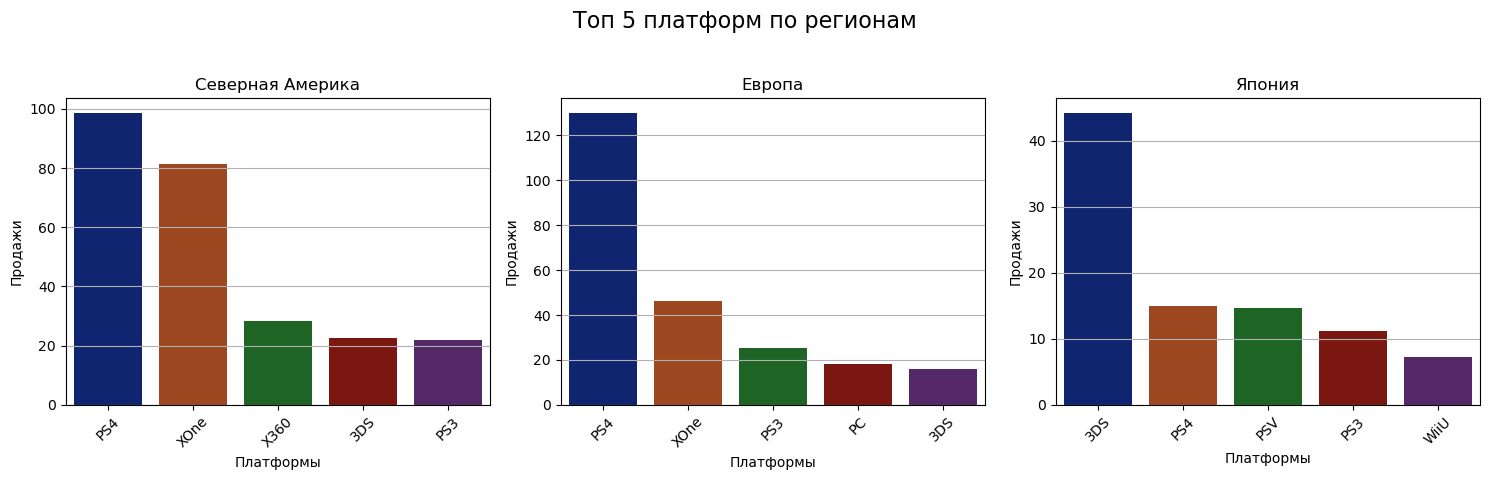

In [97]:
def plot_top_by_region(na_group, 
                      eu_group, 
                      jp_group,
                      var_column, 
                      var_title, 
                      var_x):
    
    # Создание подграфиков
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(var_title, fontsize=16)

    # Список данных и заголовков для циклической обработки
    regions = [(na_group, 'Северная Америка'), 
               (eu_group, 'Европа'), 
               (jp_group, 'Япония')]
               
    for i, (data, title) in enumerate(regions):
        # Исправление для устранения предупреждения
        sns.barplot(
            y='total_sales', 
            x=var_column, 
            hue=var_column,  # Добавляем hue
            data=data, 
            ax=ax[i], 
            palette='dark',
            legend=False  # Отключаем легенду
        )
        
        ax[i].set_title(title)
        ax[i].set_ylabel('Продажи')
        ax[i].set_xlabel(var_x)
        ax[i].grid(axis='y')  # Добавление сетки по оси Y
        ax[i].tick_params(axis='x', rotation=45)  # Поворот меток по оси X

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Корректировка расположения заголовка
    plt.show()
    
# Вызов функции
plot_top_by_region(
    na_group=na_group_platform, 
    eu_group=eu_group_platform, 
    jp_group=jp_group_platform,
    var_column='platform', 
    var_title='Топ 5 платформ по регионам', 
    var_x='Платформы'
)


1) В Северной Америке и Европе топ-1 занимает платформа "PS4".

2) в Японии 3DS.

3) В Японии и Северной Америке  пользователи отдают предпочтение только консолям.

4) В Европе в топе присутсвуют игроки на ПК.

5) В Японии топ занимают местные производители консолей.

In [99]:
# Получение группировок по регионам
na_group_genre = grouper(colunm='genre',region='na_sales')
eu_group_genre = grouper(colunm='genre',region='eu_sales')
jp_group_genre = grouper(colunm='genre',region='jp_sales')

# Вывод результатов
print("Топ 5 жанров по продажам в NA:")
display(na_group_genre)

print("\nТоп 5 жанров по продажам в EU:")
display(eu_group_genre)

print("\nТоп 5 жанров по продажам в JP:")
display(jp_group_genre)

Топ 5 жанров по продажам в NA:


,genre,total_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.58
4,Misc,15.05



Топ 5 жанров по продажам в EU:


,genre,total_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.22
4,Racing,14.13



Топ 5 жанров по продажам в JP:


,genre,total_sales
0,Role-Playing,31.23
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


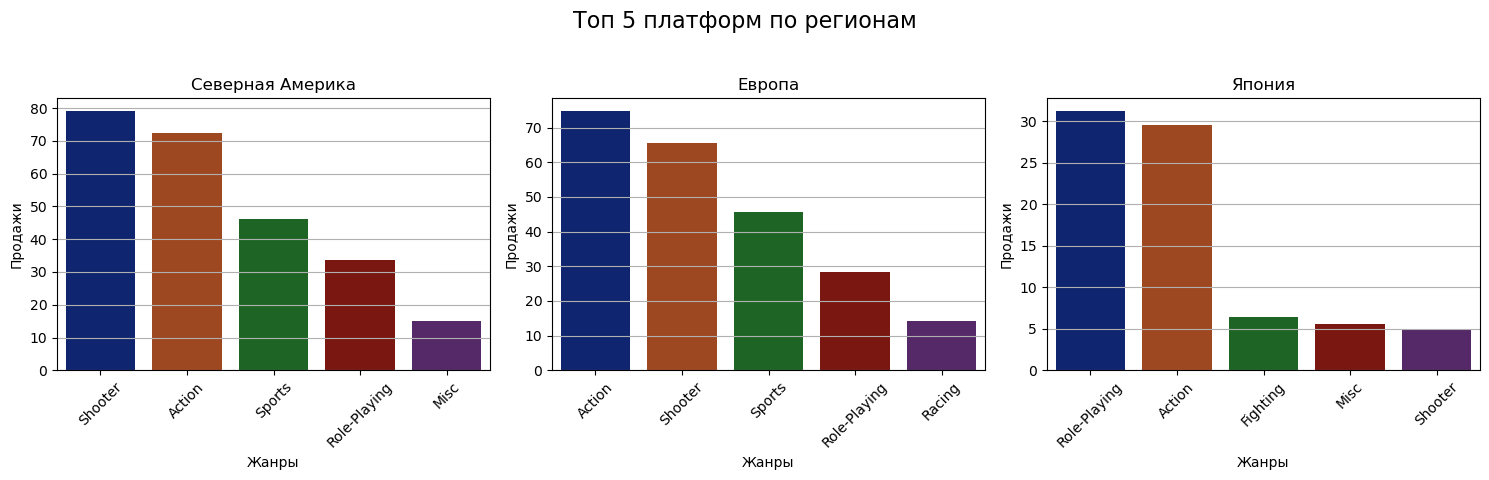

In [100]:
plot_top_by_region(na_group=na_group_genre, 
                       eu_group=eu_group_genre, 
                       jp_group=jp_group_genre,
                       var_column='genre', 
                       var_title='Топ 5 платформ по регионам', 
                       var_x='Жанры')

1) В Северной Америке топ 1 занимает жанр "Shooter".

2) В Европе топ-1 занимает занимает жанр "Action".

3) в Японии топ-1 занимает занимает жанр "Role-Playing".

4) Набор самых популярных жанров из топ 5, практически совпадает во всех регионах - 3 из 5 совпадений.


*Примечание*

Японские игроки выделяются в жанровых предпочтениях.

In [102]:
# Получение группировок по регионам
na_group_rating = grouper(colunm='rating',region='na_sales')
eu_group_rating = grouper(colunm='rating',region='eu_sales')
jp_group_rating = grouper(colunm='rating',region='jp_sales')

# Вывод результатов
print("Топ 5 рейтингов ESRB по продажам в NA:")
display(na_group_rating)

print("\nТоп 5 рейтингов ESRB по продажам в EU:")
display(eu_group_rating)

print("\nТоп 5 рейтингов ESRB по продажам в JP:")
display(jp_group_rating)

Топ 5 рейтингов ESRB по продажам в NA:


,rating,total_sales
0,M,96.42
1,not_assigned,64.72
2,E,50.74
3,T,39.06
4,E10+,33.31



Топ 5 рейтингов ESRB по продажам в EU:


,rating,total_sales
0,M,93.44
1,not_assigned,58.95
2,E,58.06
3,T,34.12
4,E10+,26.16



Топ 5 рейтингов ESRB по продажам в JP:


,rating,total_sales
0,not_assigned,56.90
1,T,14.85
2,E,8.94
3,M,8.01
4,E10+,4.46


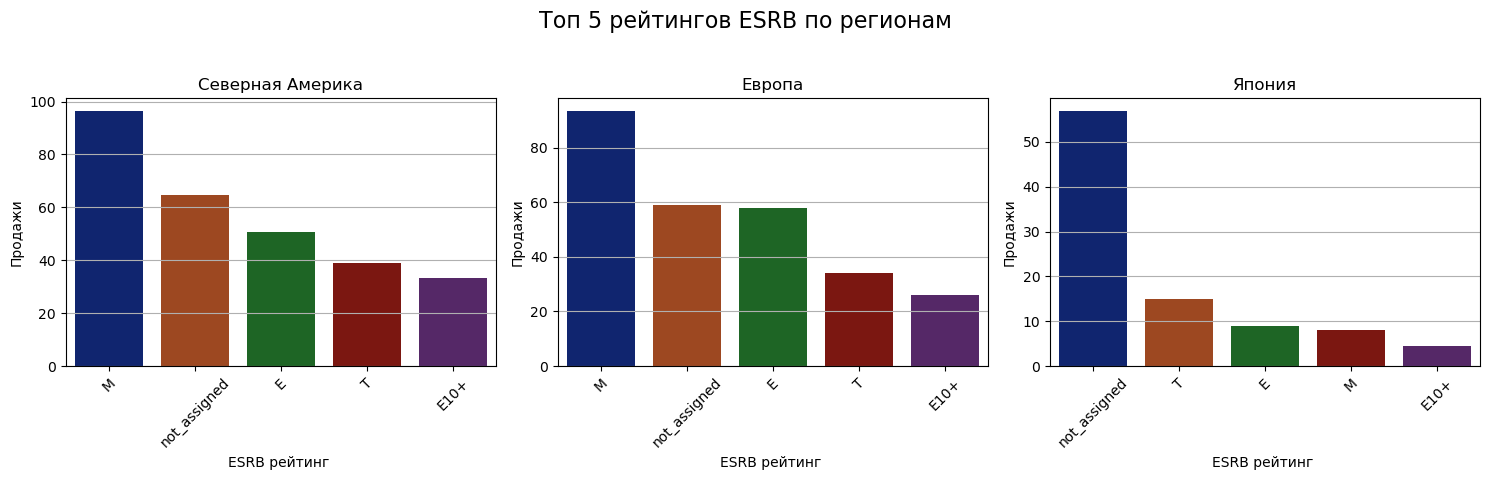

In [103]:
plot_top_by_region(na_group=na_group_rating, 
                       eu_group=eu_group_rating, 
                       jp_group=jp_group_rating,
                       var_column='rating', 
                       var_title='Топ 5 рейтингов ESRB по регионам', 
                       var_x='ESRB рейтинг ')

1) В Северной Америке и Европе топ по распределению рейтингов ESRB совпадает.

2) В Северной Америке и Европе преобладает рейтинг "М"- («Mature»). « Для взрослых».

3) В Японии в основном рейтинг неопределен.

4) В западных регионах - достаточно частое явление с неопределенным рейтингом

Возможно игры с пропуском в рейтинге редко поподают на сертификацию от ESRB, предположительно стоит передать персоналу отвественному за данные, чтоб они дополнительно просмотрели сертификацию по возрастным ограничениям от "PEGI"  или же "IARK"(С 2013-го года).

### Выводы:

1) В Северной Америке и Европе топ-1 занимает платформа "PS4", в Японии 3DS. В Японии и Северной Америке  пользователи отдают предпочтение только консолям, а в  Европе в топе присутсвуют игроки на ПК. В Японии топ занимают местные производители консолей.

2) В Северной Америке топ 1 занимает жанр "Shooter", в  Европе - "Action",а в Японии "Role-Playing".Набор самых популярных жанров из топ 5, практически совпадает во всех регионах - 3 из 5 совпадений.

3) В Северной Америке и Европе топ по распределению рейтингов ESRB совпадает - топ занял рейтинг "М"- («Mature»),В Японии в основном рейтинг неопределен.


4) Портрет пользователя для Северной Америки и Европы приблизительно совпадает, выбор платформ PS3, PS4, X360, жанры Action, Schooter, Sports, в категории М. 

5) В Японии портрет отличается, пользователи выбирают портативную 3DS, жанр Role-Playing,  с большим процентом неопределенного рейтинга.

## Проверка гипотез.

**Гипотезы которые стоит проверить:**

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*;

*Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные*.

Для 1 го случая сформулируем нулевую и альтернативную гипотезу так:

1) Н0: = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

2) Н1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [110]:
# Фильтрация строк, где оценки пользователей (user_score) не равны NaN
xone_user_scores = two_years_xone[two_years_xone['user_score'].notnull()]['user_score']
pc_user_scores = two_years_pc[two_years_pc['user_score'].notnull()]['user_score']

# Получение описательной статистики только для столбца user_score
print('Xone:')
display(xone_user_scores.describe())  # Статистика для Xone
print('PC:')
display(pc_user_scores.describe())  # Статистика для PC

Xone:


count    165.00
mean       6.59
std        1.38
min        1.60
25%        5.80
50%        6.80
75%        7.60
max        9.20
Name: user_score, dtype: float64

PC:


count    122.00
mean       6.30
std        1.70
min        1.40
25%        5.33
50%        6.80
75%        7.60
max        9.30
Name: user_score, dtype: float64

* Теперь проверим с помощью метода ```st.ttest_ind```

In [112]:
# Уровень значимости
alpha = 0.05

# Проведение t-теста
results = st.ttest_ind(xone_user_scores, pc_user_scores, equal_var=False, alternative='two-sided')

# Вывод p-значения
print("p-значение:", results.pvalue)

# Проверка нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.1151637700193269
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу - cредние пользовательские рейтинги платформ Xbox One и PC вероятно одинаковые.

Для 2 го сформулируем нулевую и альтернативную гипотезу так:

1) Н0:Средние пользовательские рейтинги жанров Action и Sports  равны.

2) Н1:Средние пользовательские рейтинги жанров Action и Sports  различаются.

In [115]:
# Фильтрация строк, где оценки пользователей (user_score) не равны NaN для жанра Action
action_user_scores = two_years_diapason.query('genre == "Action"')  
action_user_scores = action_user_scores[action_user_scores['user_score'].notnull()]['user_score']

# Фильтрация строк, где оценки пользователей (user_score) не равны NaN для жанра Sports
sports_user_scores = two_years_diapason.query('genre == "Sports"')  
sports_user_scores = sports_user_scores[sports_user_scores['user_score'].notnull()]['user_score']

# Получение описательной статистики только для столбца user_score
print('Action:')
display(action_user_scores.describe())  # Статистика для жанра Action
print('Sports:')
display(sports_user_scores.describe())  # Статистика для жанра Sports

Action:


count    297.00
mean       6.76
std        1.38
min        2.00
25%        6.10
50%        7.10
75%        7.70
max        9.00
Name: user_score, dtype: float64

Sports:


count    127.00
mean       5.22
std        1.86
min        0.20
25%        4.00
50%        5.50
75%        6.65
max        8.80
Name: user_score, dtype: float64

In [116]:
# Уровень значимости
alpha = 0.05

# Проведение t-теста
results = st.ttest_ind(action_user_scores, sports_user_scores, equal_var=False, alternative='two-sided')

# Вывод p-значения
print("p-значение:", results.pvalue)

# Проверка нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1923084551646864e-14
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports вероятно различаются.

**Пояснения:**

"Как вы сформулировали нулевую и альтернативную гипотезы":

* В первом случае, задание удовлетворяет условия для составления нулевой гипотезы, то есть сравнимаемые величины равны. Альтернативная гипотеза основывается на обратном от первого - (вопрос про равенство)  проверку надо провести двухстороннюю alternative="two-sided".

* Во втором случае, задание не удовлетворяет условия для составления нулевой гипотезы(сравнимаемые параметры равны), то есть сравнимаемые величины не равны. Для решения мы перевернули условия. (отвергнем нулевую гипотезу, значит подтвердим, что рейтинги разные). Альтернативная гипотеза проверка  двухсторонняя alternative="two-sided".

"Какой критерий применили для проверки гипотез и почему"- 

* Обычно принято применять t-тест — ведь он работает для выборок любого размера.

* Для проверки гипотезы необходимо установить уровень значимости для того или иного сравнения, обычно его выбирают из размерного ряда 1-10 %, в зависимости от изученности и требовательности к данным. Часто его устанавливают в среднем значении 0,05 - дополнительных требований на этот счет не было поэтому было взято самое распространенное.


**Выводы:**

1) Средние пользовательские рейтинги платформ Xbox One и PC вероятно одинаковые.

2) Cредние пользовательские рейтинги жанров Action и Sports вероятно различаются.

##  Общие выводы.

***В представленной работе были выполенны следующие этапы:***

1) *предобработка даных :*

* Названия столбцов были приведены к "нормализированному" виду.

* Были обработаны пропуски, за исключением оценок пользователей и критиков.

*  Пропуски по оценкам (пользователи и критики) - составляют ощутимый процент от всего датафрейма, при дальнейших иссследованиях могут понадобиться отдельные срезы для чистоты выводов.

* Были исправлены нелогичные типы данных.

* Был добавлен столбец с данными об общих продажах.

2) *Анализ данных:*

 * в периоде до 1990 года игры выпускались редко, это может быть связано с тем что отросоль только развивалась, при этом от 1990 года пошел активный рост релизов до 2010 года, далее пошел небольшой спад.

 * Судя по всему проекты стали сложнее технически и на их разработку стало тратиться больше времени, а пики указывают на то что студии старались успеть за конкурентами и поэтому год релиза популярных проектов часто совпадал.

 * Максимальные суммарные продажи за платформами "PS2", "X360", "PS3", "Wii", "DS", "PS".

 * Платформы живут примерно в течении 10 лет, но имеют пиковые значение всего 5 лет.

 * За последние 2 года платформа PS4 и XOne имели успех, но так же имеют тенденцию идти на спад.

 * Продажи слабо зависят от оценок пользователей , при этом к оценкам критиков прислушиваются.

 * Наибольший спросс за два года имеют игры с жанром "Action, Schooter" и "Sports", так же перспективу имеет "Role_paling".

3) *Региональный анализ профиля пользователя:*

 * В Северной Америке и Европе топ-1 занимает платформа "PS4", в Японии 3DS. В Японии и Северной Америке пользователи отдают предпочтение только консолям, а в Европе в топе присутсвуют игроки на ПК. В Японии топ занимают местные производители консолей.

 * В Северной Америке топ 1 занимает жанр "Shooter", в Европе - "Action",а в Японии "Role-Playing".Набор самых популярных жанров из топ 5, практически совпадает во всех регионах - 3 из 5 совпадений.

 * В Северной Америке и Европе топ по распределению рейтингов ESRB совпадает - топ занял рейтинг "М"- («Mature»),В Японии в основном рейтинг неопределен.

 * Портрет пользователя для Северной Америки и Европы приблизительно совпадает, выбор платформ PS3, PS4, X360, жанры Action, Schooter, Sports, в категории М.

 * В Японии портрет отличается, пользователи выбирают портативную 3DS, жанр Role-Playing, с большим процентом неопределенного рейтинга.
 
4) *Проверка гипотез:*
 
 * Средние пользовательские рейтинги платформ Xbox One и PC вероятно одинаковые.
 
 * Cредние пользовательские рейтинги жанров Action и Sports вероятно различаются.

***Примечания для заказчиков:***

1) *Предобратока:* 

* Пропуски случаях оценок, и простановки рейтингов, могли появится из за малой популярности игры, или же из за фокуса прверяющих органов на более актуальных проектах.

2) *Анализ*:

 * Судя по всему проекты стали сложнее технически и на их разработку стало тратиться больше времени, а пики указывают на то что студии старались успеть за конкурентами и поэтому год релиза популярных проектов часто совпадал.

 * Для более честного разбора рекомендуется анализировать в разрезе каждых 2-3 лет, примерно в это время возникает какое нибудь революционное решение в гейдеве.

 * В целом, данные показывают, что оценки критиков оказывают более значимое влияние на продажи игр по сравнению с оценками пользователей.

 * Умеренная положительная корреляция между оценками критиков и пользователей может указывать на то, что игры, которые нравятся критикам, также могут быть привлекательными для игроков.

 * Отсутствие связи между оценками пользователей и продажами предполагает необходимость анализа других факторов, влияющих на коммерческий успех игр.



3) *Проверка гипотез:*

 * Возможно игры с пропуском в рейтинге редко поподают на сертификацию от ESRB, предположительно стоит передать персоналу отвественному за данные, чтоб они дополнительно просмотрели сертификацию по возрастным ограничениям от "PEGI" или же "IARK"(С 2013-го года).


***Общие рекомендации:***

По результату работы можно вынести общие рекомендации- 

* При выборе актуального периода для исследований прогнозов на следующий год следует руководствоваться принципом то геймдев - активно развивающаяся отрасль, в ней присутсует большая конкуренция и она сильно зависит многих факторов, на текущий момент оптимальный диапазон это 2-3 года, но стратегию стоит динамически рассматриват вместе с движением отрасли.

* При рассмотрении перспективных жанров - стоит понимать, что с развитием техники и отрасли могут и кординально поменяться жанры, при этом по нынешним данным люди любят активности - "стрелялки" и "активные бегалки" "ролевой отыгрыш" , на эти направления можно сделать текущий упор. По спортивным играм - интерес будет всегда так как спорт в реальной жизни отличная реклама для сегмента. Так же стоит присмотреться к киберспорту - возможно скоро данная тематика взлетит в популярности и кто успеет первым - поличит большой профит.

* Стоит провести отдельное иследование на тему мобильного гейминга, перспективное направление.

* По портрету игроков с трех самых многочисленных регионов видна разница в любви к особым жанрам и типу платформы, Япония - больше любит свои изобретения и аспектируется на ролевом отыгрыше на консолях, а запад (Европа и Сев.Америка) Более разнообразны , при этом в Европе достаточно популярны игры на ПК - это стоит принимать во внимание.


* Высокие уровни продаж жанра Action обусловлены огромным колличеством игр в данном жанре, так же видно что весьма перспективным является жанр Shooter, Sports, об этом говорит то, что в среднем выбор стоит за этими жанрами. Не стоит списывать со счтетов жанр Role_play ,fighting  и platform в среднем (и по медиане) они держатся на одном популярном уровне уступая фаворитам, но занимающими хороший серединный уровень.